## Basic integration problems

Summing vortices in a vortex sheet from a elliptically loaded lifting line requires the evaluation of a difficult integral prove that the downwash is constant.  

Rather than in-lining and glossing over this tricky calculation within the mathematical explanation, we bring it up and solve it here so that we may quote it properly when it is applied.

The task is to prove that ([Eq 12.58](https://web.stanford.edu/~cantwell/AA200_Course_Material/AA200_Course_Notes/AA200_Ch_12_Wings_of_Finite_Span_Cantwell.pdf)):
$$\int_{- \frac{\pi}{2}}^{\frac{\pi}{2}} \frac{\sin{\left (x \right )}}{\sin{\left (b \right )} - \sin{\left (x \right )}}\, dx = \pi$$
while treating the singularity at $x=b$ properly.  

The answer for $b=0$ is obvious.



In [1]:
# Using sympy to do symbolic manipulations
import sympy as sp
sp.init_printing()
from IPython.display import display
x, a, b = sp.symbols("x a b", real=True)


Define:


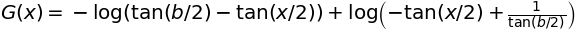

In [2]:
F1 = sp.Function("G")(x)
F1expr = -(sp.log((sp.tan(-x/2)+sp.tan(b/2))) - sp.log((sp.tan(-x/2) + 1/sp.tan(b/2))))
print("Define:")
display(sp.Eq(F1, F1expr))


Then:


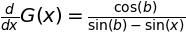

In [3]:
dF1 = sp.diff(F1, x)
dF1expr = dF1.subs(F1, F1expr).doit().simplify().simplify()
print("Then:")
display(sp.Eq(dF1, dF1expr))

In [4]:
F = sp.Function("F")(x)
Fexpr = F1*sp.tan(b) - x
print("Define:")
display(sp.Eq(F, Fexpr))

Define:


Then:


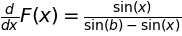

In [5]:
dF = sp.diff(F, x)
dFexpr = dF.subs(F, Fexpr).doit().simplify().subs(dF1, dF1expr).simplify()
print("Then:")
display(sp.Eq(dF, dFexpr))

If there was no singularity, then:


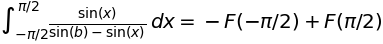

And since:


where:


which expands to:


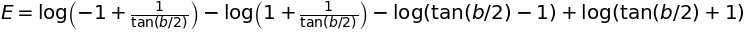

But then:


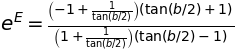

which simplifies to:


So that the result of the integral would be:


Which can't be true because the integrand is always real in the interval.


In [6]:
f = sp.Function("f")(x)
intdF = sp.integrate(f, (x, -sp.pi/2, sp.pi/2)).subs(f, dFexpr)
print("If there was no singularity, then:")
r1 = F.subs(x, sp.pi/2) - F.subs(x, -sp.pi/2)
display(sp.Eq(intdF, r1))

print("And since:")
r2 = Fexpr.subs(x, sp.pi/2) - Fexpr.subs(x, -sp.pi/2)
E = sp.Symbol("E")
Eexpr = F1.subs(x, sp.pi/2) - F1.subs(x, -sp.pi/2)
r4 = E*sp.tan(b) - sp.pi
r4expr = Eexpr*sp.tan(b) - sp.pi
r42 = sp.Eq(r4expr, r2)
assert r42.simplify() == True
display(sp.Eq(r1, r4))
print("where:")
display(sp.Eq(E, Eexpr))

print("which expands to:")
Eexpre = F1expr.subs(x, sp.pi/2) - F1expr.subs(x, -sp.pi/2)
display(sp.Eq(E, Eexpre))

print("But then:")
display(sp.Eq(sp.exp(E), sp.exp(Eexpre)))
print("which simplifies to:")
display(sp.Eq(sp.exp(E), sp.exp(Eexpre).simplify()))

print("So that the result of the integral would be:")
display(sp.I*sp.pi*sp.tan(b) - sp.pi)
print("Which can't be true because the integrand is always real in the interval.")

Instead, let's write this integral and leave a little interval around the singularity


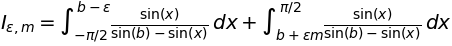

In [119]:
print("Instead, let's write this integral leaving out a little interval around the singularity.")
epsilon = sp.Symbol("epsilon", real=True)
m = sp.Symbol("m", real=True, positive=True)
display(sp.Gt(epsilon, 0), sp.Gt(sp.Symbol("m"), 0))
m = sp.Symbol("m", real=True, positive=True)  # can't display "m>0" without it converting to True 

Iem = sp.Symbol("I_{\epsilon,m}")
intdFe = sp.integrate(f, (x, -sp.pi/2, b-epsilon)).subs(f, dFexpr) + \
         sp.integrate(f, (x, b+epsilon*m, sp.pi/2)).subs(f, dFexpr)
display(sp.Eq(Iem, intdFe))


We cannot assume we can isolate this singularity symmetrically, because the integration 
given is derived by a substitution of an $x$ coordinate in real space by a $sin(\theta)$, 
and if we are going to fudge any symmetric cancelling out of infinities, it had 
better be done along a real spacial coordinate. 


In [123]:
r1e = F.subs(x, b-epsilon) - F.subs(x, -sp.pi/2) + F.subs(x, sp.pi/2) - F.subs(x, b+epsilon*m)
print("Then:")
display(sp.Eq(Iem, r1e))

Then:


In [125]:
Eexpre = F1.subs(x, b-epsilon) - F1.subs(x, -sp.pi/2) + F1.subs(x, sp.pi/2) - F1.subs(x, b+epsilon*m)
r2e = Fexpr.subs(x, b-epsilon) - Fexpr.subs(x, -sp.pi/2) + Fexpr.subs(x, sp.pi/2) - Fexpr.subs(x, b+epsilon*m)
Eem = sp.Symbol("E_{\epsilon,m}")
r4e = Eem*sp.tan(b) - sp.pi + (1+m)*epsilon
r4expre = Eexpre*sp.tan(b) - sp.pi + (1+m)*epsilon
r42e = r4expre - r2e
assert r42e.simplify() == 0

Eexpre1 = F1expr.subs(x, b-epsilon) - F1expr.subs(x, -sp.pi/2) + F1expr.subs(x, sp.pi/2) - F1expr.subs(x, b+epsilon*m)


In [129]:
print("Performing the same simple substitution as before, we get:")
display(sp.Eq(Iem, r4e))
print("where:")
display(sp.Eq(Eem, Eexpre))

Performing the same simple substitution as before, we get:


where:


so that:


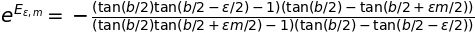

In [137]:
print("so that:")
expEexpre1 = sp.exp(Eexpre1).simplify()
display(sp.Eq(sp.exp(Eem), expEexpre1))


In [136]:
# This proves the assertion below
assert sp.Eq(sp.limit(expEexpre1, epsilon, 0), m)


According to sympy 
$$\lim_{\epsilon \to 0} e^{E_{\epsilon,m}} = m$$
therefore
$$\lim_{\epsilon \to 0} I_{\epsilon,m} = \log(m) \tan(b) - \pi$$